<a href="https://colab.research.google.com/github/AtchuthBandaru112/F.M.M.L.-LABS-PROJECTS/blob/main/mod3_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### LAB-4 : Understanding Cross-Validation and Standardization
#### Module Coordinator: Jashn Arora
---

# **Section 1: Tweaking the parameters**

Let's stat the lab by writing knn code on a cancer detection dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [3]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
X = cancer.data
y = cancer.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

## Section 1.1: Changing Value of K
Let's try to run the knn with different values of knn and compare the results

In [8]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

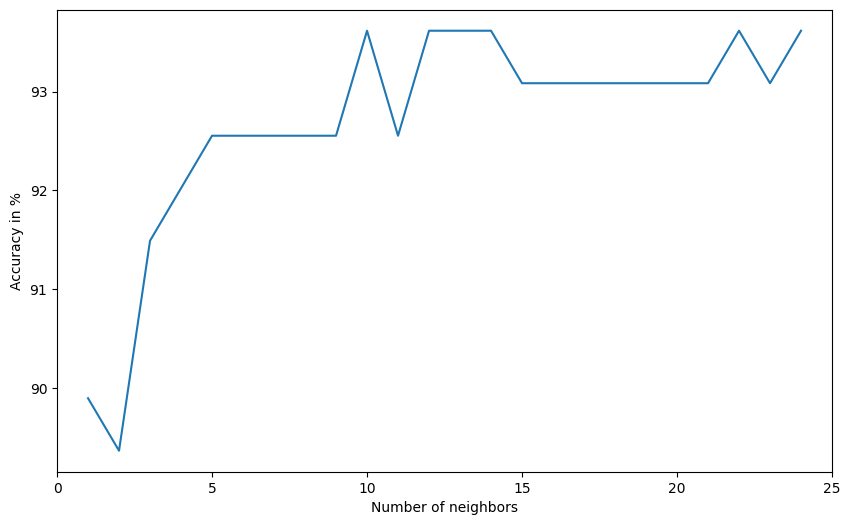

In [9]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [10]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


In this case, we see that the ideal number of neighbours can take any one of the values in the list [10,12,13,14,22,24].  
However, this only tells us the effectiveness of the KNN classifier only if we have the same train-test split considered above. It still does not tell us how well the algorithm would perform if the test set were different. The results would have been different if we had split the data differently.

### AUC-ROC Curve

The AUC - ROC curve is a performance measurement for classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.
It tells how much the model is capable of distinguishing between classes.  
The diagonal in the curve divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random).    
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with the TPR (True Positive Rate) on the y-axis, and the FPR (False Positive Rate) on the x-axis.

In [11]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

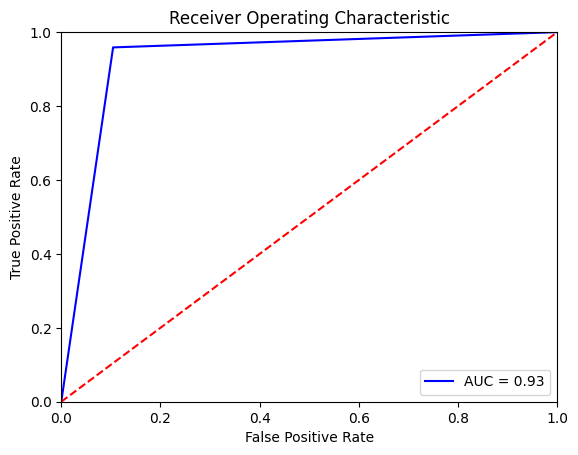

In [12]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

## Section 1.2: KNN using a different train-test split

In [13]:
## Changing the random_state value here so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

In [14]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

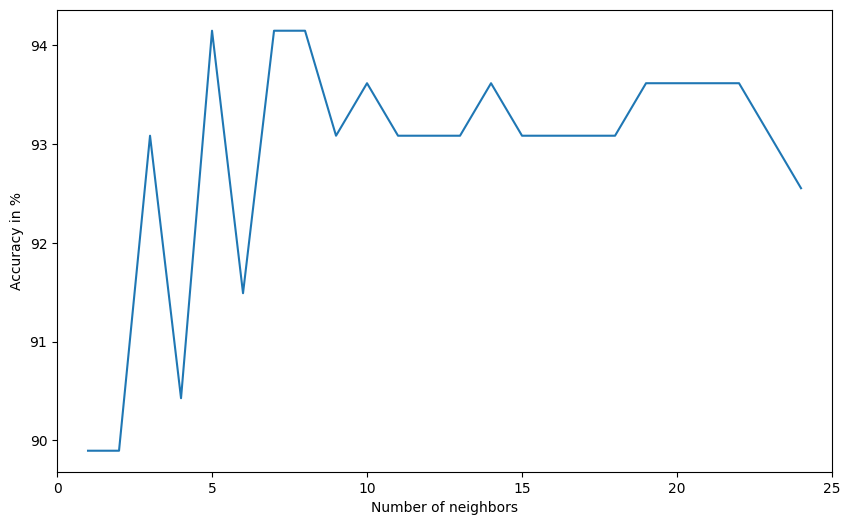

In [15]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [16]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

94.14893617021278
[5, 7, 8]


As you can see, the model gives different results when we split the data differently. Here, it suggests that the ideal k value is 5, 7 or 8.

# **Section 2: Cross Validation**

As you saw in the above two cases with different train-test splits, there is a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.  

Cross Validation is an important technique in Machine Learning to analyze the performance of a model on **unseen** data.  

There are different kinds of cross-validation methods: exhaustive and non-exhaustive.   
Exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.
Non-exhaustive cross validation methods do not compute all ways of splitting the original sample.

One of the most commonly cross-validation methods is **K-Fold Cross validation**. The procedure for K-Fold Cross Validation is as follows:  
1. Split the dataset into k groups (typically without shuffling)
2. For each unique group:  
  a. Take the group as a hold out or test data set  
  b. Take the remaining groups as a training data set  
  c. Fit a model on the training set and evaluate it on the test set  
  d. Retain the evaluation score and discard the model  
3. Summarize the performance of the model using the mean of model evaluation scores over all the folds.

Image source: https://scikit-learn.org/stable/modules/cross_validation.html  
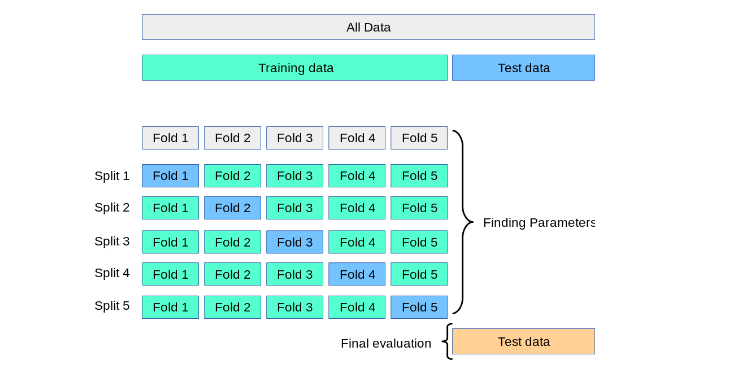

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [18]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

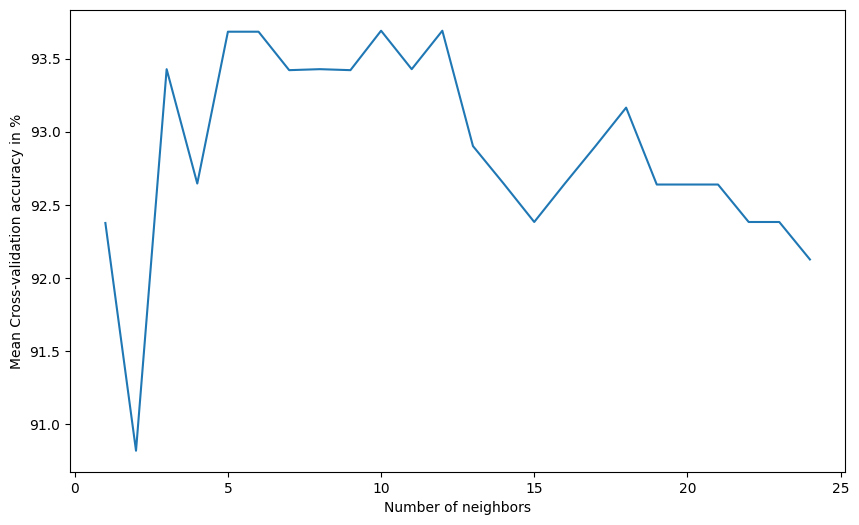

In [19]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [20]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

[10, 12]


Note that the accuracy in the above case is not the accuracy on the test set. We plot the mean of the accuracies obtained during cross-validation, when we considered different splits of the training set.  

From the plot above, we can see that when the value of k is 10 or 12, our KNN model generalizes well to unseen data. Performing such cross validation gives us an idea about the parameters to choose when using a machine-learning algorithm.

In [21]:
## TASK-1:
## In the above case, we saw K-Fold cross validation, where we split the dataset into K consecutive folds without taking anything else into account.
## Stratified KFold is another strategy that is commonly used, which preserves the percentage of samples for each class in the folds.
## Implement Stratified KFold (refer Sklearn docs) and display the results you obtain

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Initialize StratifiedKFold with 5 splits (you can change this to any number)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracy for each fold
accuracies = []

# Initialize KNN classifier (you can adjust the value of k based on previous task results)
knn = KNeighborsClassifier(n_neighbors=5)

# Iterate through each fold
for train_index, test_index in stratified_kfold.split(X, y):
    # Split the data into training and testing based on the indices from StratifiedKFold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the KNN classifier on the current fold's training data
    knn.fit(X_train, y_train)

    # Make predictions on the current fold's test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print classification report for the current fold
    print(f"Classification Report for fold {len(accuracies)}:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print("-" * 50)

# Display the results: Mean Accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy across all Stratified K-Folds: {mean_accuracy:.4f}")


Classification Report for fold 1:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
Classification Report for fold 2:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

--------------------------------------------------
Classification Report for fold 3:
              precision    recall 

# **Section 3: Standardization**


Scaling the data that we have available is a recommended pre-processing step when working with many machine learning algorithms. The scale and distribution of the data drawn from the domain may be different for each variable. Differences in the scales across input variables may increase the difficulty of the problem being modeled, and the model may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.  

Standardization (also called z-score normalization) is one such scaling technique that transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ \text{New (scaled) value} = {X - \mu \over \sigma}$$


In [22]:
X = cancer.data
y = cancer.target

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [25]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

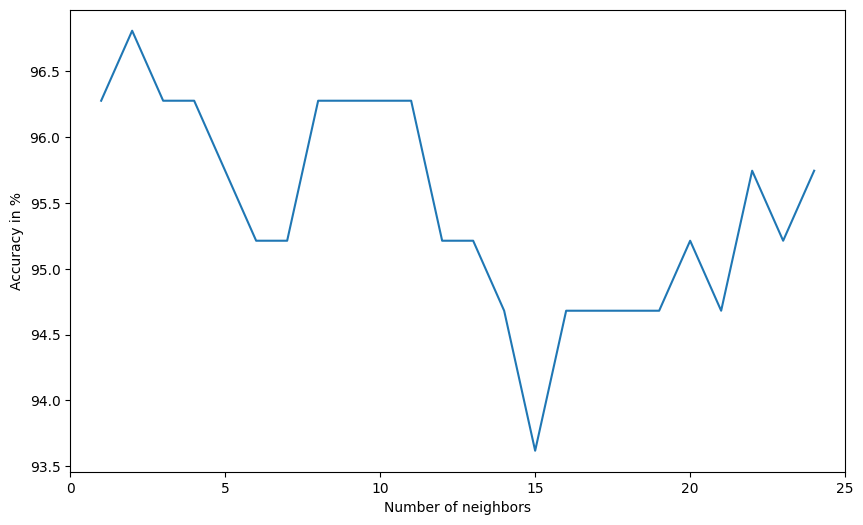

In [26]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [27]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

96.80851063829788
[2]


In [28]:
## TASK-2:
## Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
## Also print out the Precision, Recall and F1-score values

Optimal value of k: 1


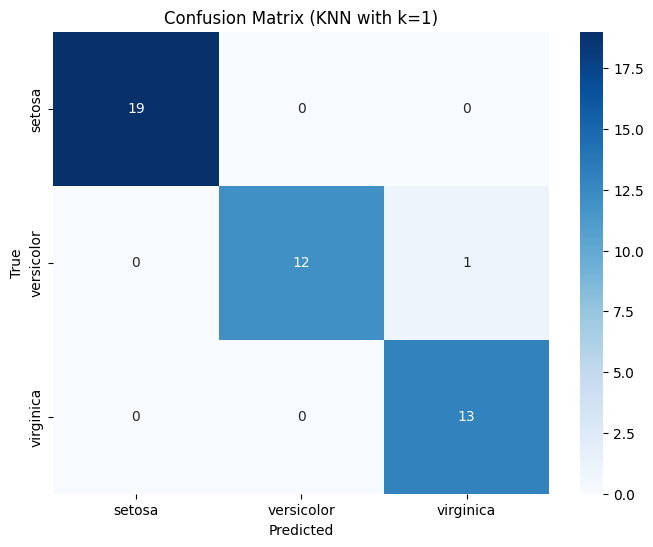

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Define the parameter grid to search for optimal k (e.g., k from 1 to 20)
param_grid = {'n_neighbors': np.arange(1, 21)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Step 4: Use GridSearchCV to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the optimal k value and the corresponding score
optimal_k = grid_search.best_params_['n_neighbors']
print(f"Optimal value of k: {optimal_k}")

# Step 5: Train the KNN model with the optimal k value
best_knn = grid_search.best_estimator_

# Step 6: Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title(f"Confusion Matrix (KNN with k={optimal_k})")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 9: Print classification report (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred, target_names=data.target_names))


In [29]:
## TASK-3:
## Perform K-Fold Cross validation after standardizing the data. Display your results.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Initialize the classifier (Logistic Regression in this case)
model = LogisticRegression(max_iter=200)

# Step 3: Set up K-Fold Cross Validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Perform cross-validation using cross_val_score
cv_results = cross_val_score(model, X_scaled, y, cv=kf)

# Step 5: Display the results
print(f"Cross-validation scores for each fold: {cv_results}")
print(f"Mean accuracy: {np.mean(cv_results):.4f}")
print(f"Standard deviation of accuracy: {np.std(cv_results):.4f}")


Cross-validation scores for each fold: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean accuracy: 0.9600
Standard deviation of accuracy: 0.0249


In [30]:
## TASK-4:
## Plot the vornoi and decision boundary diagram for the classifier from TASK-3

Optimal value of k: 17


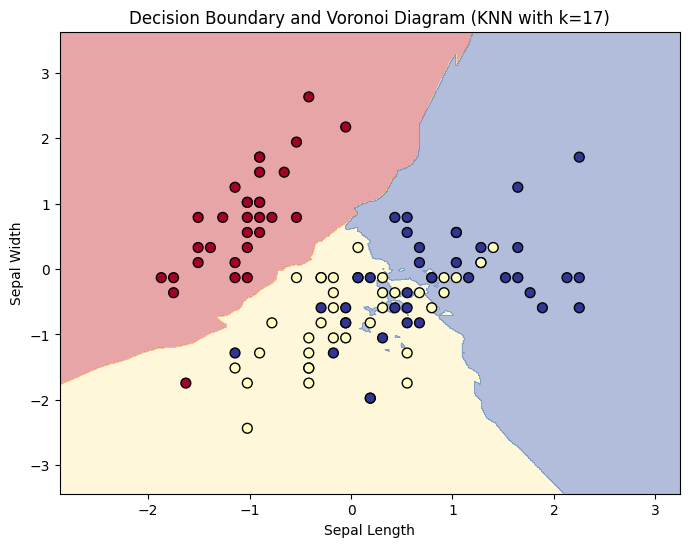

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Use only the first two features for easy 2D visualization
X = X[:, :2]  # Taking the first two features (sepal length and sepal width)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the parameter grid to search for optimal k (e.g., k from 1 to 20)
param_grid = {'n_neighbors': np.arange(1, 21)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the optimal k
optimal_k = grid_search.best_params_['n_neighbors']
print(f"Optimal value of k: {optimal_k}")

# Train the KNN model with the optimal k value
best_knn = grid_search.best_estimator_

# Step 1: Plot the decision boundary and Voronoi diagram
# Create a meshgrid for plotting decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the grid
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Step 2: Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title(f"Decision Boundary and Voronoi Diagram (KNN with k={optimal_k})")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Display the plot
plt.show()


### Questions to Think About and Answer
1. Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.  
What do you think are the pros/cons of this method ?  
2. Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.

### **Pros and Cons of Splitting Data into Training, Validation, and Test Sets**

When splitting the dataset into three distinct sets (train, validation, and test), the goal is to have separate subsets for training the model, validating it (tuning hyperparameters), and testing its final performance. This method is simple and commonly used, but it has its advantages and drawbacks.

#### **Pros**:
1. **Simplicity**:
   - The method is straightforward to implement and understand. You only need to split the data once, and you can train, validate, and test your model in three separate steps.

2. **Efficiency**:
   - This approach is computationally less expensive than **K-Fold Cross-Validation** because it only requires three data splits and training occurs only once.

3. **Lower Overhead**:
   - If the dataset is relatively small and doesn't require intensive hyperparameter tuning, this approach can be quicker compared to running multiple folds in cross-validation.

4. **Clear Separation of Data**:
   - Since the data is split into three sets, you avoid the possibility of data leakage from the validation or test set into the training process, as long as the sets are properly maintained.

#### **Cons**:
1. **Limited Data for Training**:
   - The model is trained only on a portion of the data (training set). With fewer data points in the training set, the model may not generalize well, especially if the dataset is small.
   
2. **Risk of Overfitting or Underfitting**:
   - Since the validation set is used to tune the model, the model might **overfit** the validation data, leading to poor generalization on unseen test data. This is particularly true if the validation set is small.
   
3. **Less Reliable Evaluation**:
   - The performance on the **test set** may not represent the true performance of the model. This is because the model may have been indirectly "tuned" on the validation set, leading to potential bias. Moreover, with a single train-validation-test split, you don't get multiple evaluations, which could reduce the reliability of the estimate.

4. **Data Split Variability**:
   - The results may be dependent on how the data is split. A random or biased split could lead to over-optimistic or overly pessimistic evaluations. The random variability could lead to unreliable estimates of model performance.

---

### **K-Fold Cross Validation: Exhaustive or Non-Exhaustive?**

**K-Fold Cross Validation** is generally considered an **exhaustive** cross-validation method. Here's why:

#### **Exhaustive Nature**:
1. **Multiple Evaluations**:
   - In **K-Fold Cross Validation**, the data is split into `K` different folds. Each fold serves as the test set once, while the remaining `K-1` folds are used for training. This process is repeated `K` times, allowing each instance of the data to be used for both training and testing.
   
2. **Full Use of Data**:
   - Every data point is used for training and testing, ensuring that the model's performance is evaluated on all available data. This exhaustively tests the model on all subsets of the data, leading to a more robust evaluation of model performance.

3. **No Data Wastage**:
   - Unlike a simple train-validation-test split where a portion of the data is never used for testing, **K-Fold Cross Validation** ensures that each data point is part of the test set once. Therefore, it minimizes the chance of data being wasted in the evaluation process.

4. **Low Variance**:
   - Because it uses all the data for both training and testing in different iterations, **K-Fold** tends to give a more reliable estimate of the model's true performance. This reduces the variance introduced by a random train-test split, making it more stable compared to a single split.

#### **Summary**:
- **K-Fold Cross Validation** is considered **exhaustive** because it ensures that the model is tested on all data points, and each point is used for both training and testing. This comprehensive evaluation leads to more reliable performance metrics.

---

### **Comparison with the Train-Validation-Test Split Approach**:

- In the **Train-Validation-Test Split** approach, you may only train on a portion of the data, and there’s no assurance that every data point has been tested, especially if you use a small validation or test set. This approach is more **non-exhaustive**, as it doesn't evaluate the model on every data point, and the performance can vary significantly depending on how the data is split.

#### **Key Differences**:
- **Train-Validation-Test Split** uses one split of data and typically requires careful randomization to avoid bias, which may lead to unreliable estimates if the split is poor.
- **K-Fold Cross Validation** uses multiple splits, making it a more robust and reliable method of model evaluation.

### **Conclusion**:

- **Train-Validation-Test Split**:
  - Simple and computationally less expensive.
  - Can be biased based on the data split.
  - Less reliable, especially with small datasets or imbalanced class distributions.

- **K-Fold Cross Validation**:
  - Exhaustive, using every data point for both training and testing.
  - More reliable for evaluating model performance, especially on small datasets.
  - More computationally expensive, as it requires multiple training and testing phases.

If you have enough computational resources and you want a more robust performance estimate, **K-Fold Cross Validation** is generally the better choice. However, if computational efficiency is a priority and you're confident that a single data split will suffice, the **Train-Validation-Test Split** approach may be appropriate.

### Useful Resources for further reading
1. Cross validation (scikit-learn): https://scikit-learn.org/stable/modules/cross_validation.html  
2. Wikipedia: https://en.wikipedia.org/wiki/Cross-validation_(statistics)  
3. Standardization: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/  
4. AUC-ROC : https://en.wikipedia.org/wiki/Receiver_operating_characteristic
